## Introduction

In the competition, it's required to predict the `y` `Rented Bike count (Target), Count of bikes rented at each hour` .

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

*You can submit up to 2 submissions per day. You can select only one of the submission you make to be considered in the final ranking.*


Data fields
- ID - an ID for this instance
- Date - year-month-day
- Hour - Hour of he day
- Temperature - Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)
- y - Rented Bike count (Target), Count of bikes rented at each hour

## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [1]:
import pandas as pd
import os
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

#Encoding
from sklearn.preprocessing import LabelEncoder


In [2]:
# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Exploratory Data Analysis

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [3]:
dataset_path = '/kaggle/input/seoul-bike-rental-ai-pro-iti/'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head(5)

The shape of the dataset is (5760, 15).




,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.rename(columns={'Temperature(�C)':'Temperature(C)','Dew point temperature(�C)':'Dew point temperature(C)'},inplace=True)

We've got 5760 examples in the dataset with 15 featues.

By looking at the features and a sample from the data, the features look of numerical and catogerical types.

In [5]:
print(df.columns.values)

['ID' 'Date' 'y' 'Hour' 'Temperature(C)' 'Humidity(%)' 'Wind speed (m/s)'
 'Visibility (10m)' 'Dew point temperature(C)' 'Solar Radiation (MJ/m2)'
 'Rainfall(mm)' 'Snowfall (cm)' 'Seasons' 'Holiday' 'Functioning Day']


## Categorical: 
- Seasons
- Holiday
- Functioning Day


## Continous:
- y (target)
- Hour
- Temperature(�C)
- Humidity(%)
- Wind speed (m/s)
- Visibility (10m)
- Dew point temperature(�C)
- Solar Radiation (MJ/m2)
- Rainfall(mm)
- Snowfall (cm)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5760 non-null   int64  
 1   Date                      5760 non-null   object 
 2   y                         5760 non-null   int64  
 3   Hour                      5760 non-null   int64  
 4   Temperature(C)            5760 non-null   float64
 5   Humidity(%)               5760 non-null   int64  
 6   Wind speed (m/s)          5760 non-null   float64
 7   Visibility (10m)          5760 non-null   int64  
 8   Dew point temperature(C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)   5760 non-null   float64
 10  Rainfall(mm)              5760 non-null   float64
 11  Snowfall (cm)             5760 non-null   float64
 12  Seasons                   5760 non-null   object 
 13  Holiday                   5760 non-null   object 
 14  Function

In [7]:
print(df.shape)
df.describe(include=['O'])

(5760, 15)


,Date,Seasons,Holiday,Functioning Day
count,5760,5760,5760,5760
unique,240,4,2,2
top,08/11/2018,Autumn,No Holiday,Yes
freq,24,1440,5520,5513


In [8]:
df.drop(columns='ID').describe()

,y,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [9]:
for col in df.columns:
    print(col)
    print("------------------------")
    print(df[col].unique())
    print("------------------------")

ID
------------------------
[   0    1    2 ... 5757 5758 5759]
------------------------
Date
------------------------
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018' '05/01/2018'
 '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018' '10/01/2018'
 '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018' '15/01/2018'
 '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018' '20/01/2018'
 '01/02/2018' '02/02/2018' '03/02/2018' '04/02/2018' '05/02/2018'
 '06/02/2018' '07/02/2018' '08/02/2018' '09/02/2018' '10/02/2018'
 '11/02/2018' '12/02/2018' '13/02/2018' '14/02/2018' '15/02/2018'
 '16/02/2018' '17/02/2018' '18/02/2018' '19/02/2018' '20/02/2018'
 '01/03/2018' '02/03/2018' '03/03/2018' '04/03/2018' '05/03/2018'
 '06/03/2018' '07/03/20

In [10]:
# Number of NaNs in each row
print(df.isnull().sum(axis=1).unique())
df.isnull().sum(axis=1).head(15)

[0]


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [11]:
# Number of NaNs in each Column 
print(df.isnull().sum(axis=0).unique())
df.isnull().sum(axis=0).head(15)

[0]


ID                          0
Date                        0
y                           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

----------------

know some about data

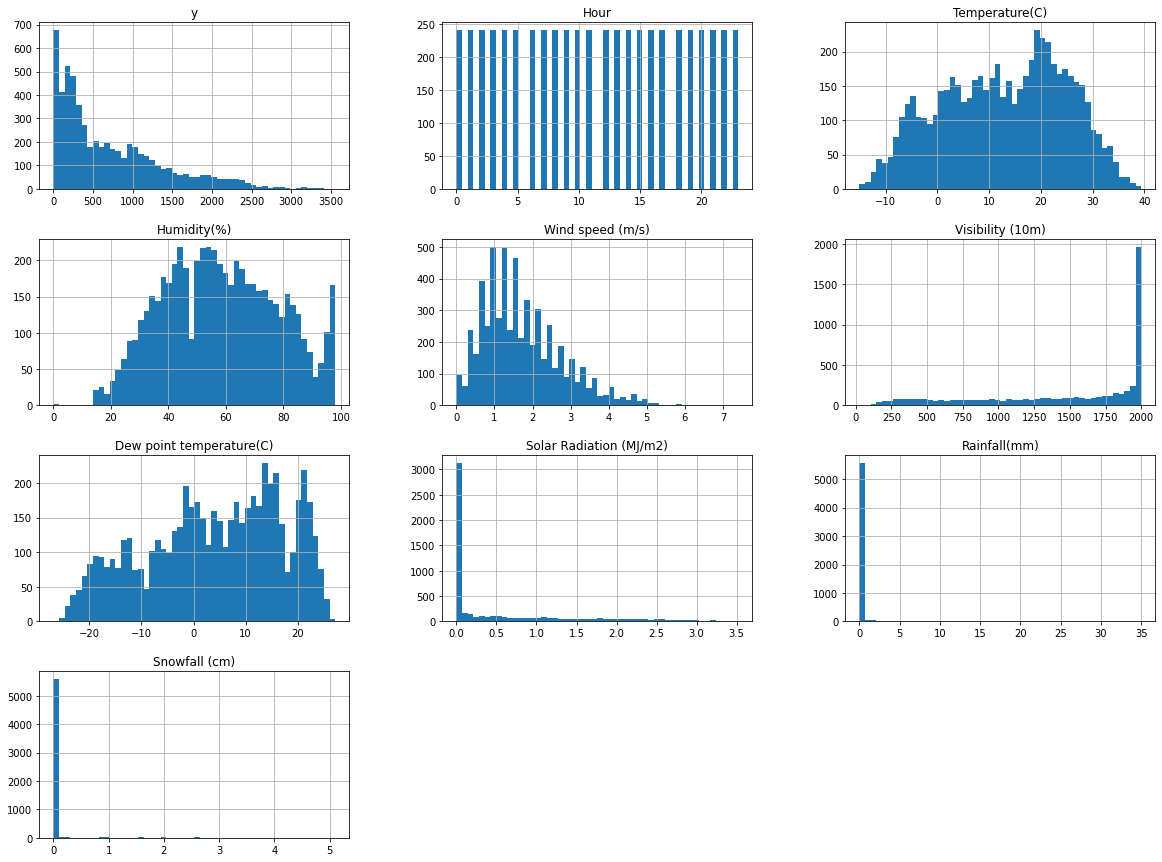

In [12]:
df.drop(columns='ID').hist(bins=50, figsize=(20,15))
plt.show()

**split and make the test set**

In [13]:
df["Seasons"].value_counts()

Autumn    1440
Winter    1440
Summer    1440
Spring    1440
Name: Seasons, dtype: int64

In [14]:
corr_matrix = df.corr()
corr_matrix["y"].sort_values(ascending=False)[1:]

Temperature(C)              0.544281
Hour                        0.407180
Dew point temperature(C)    0.392454
ID                          0.365359
Solar Radiation (MJ/m2)     0.250601
Visibility (10m)            0.214777
Wind speed (m/s)            0.116380
Rainfall(mm)               -0.117711
Snowfall (cm)              -0.120836
Humidity(%)                -0.191603
Name: y, dtype: float64

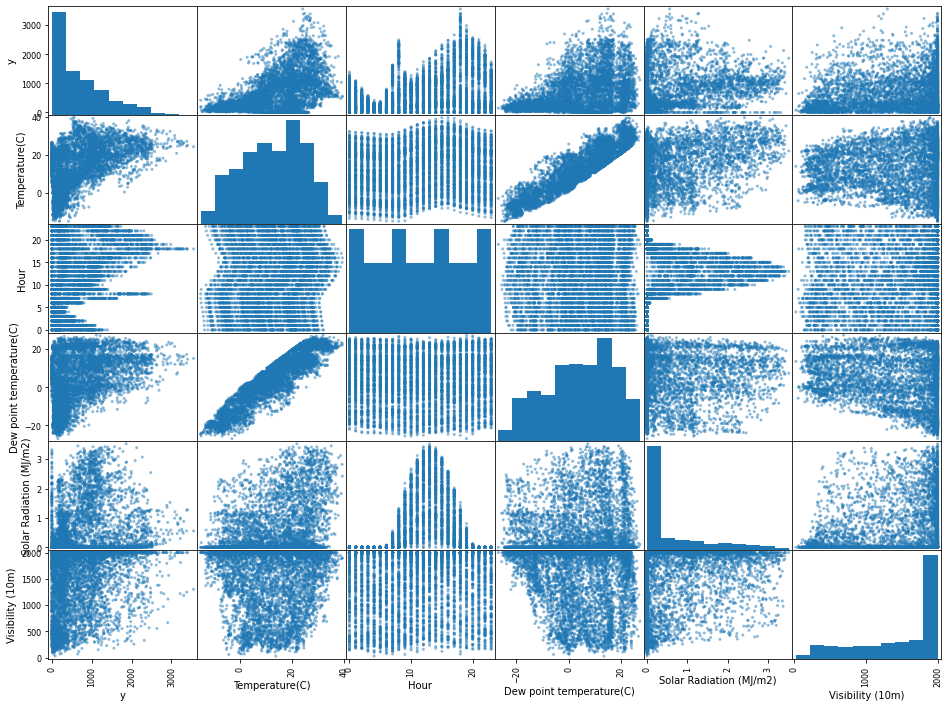

In [15]:
from pandas.plotting import scatter_matrix

attributes = ['y',"Temperature(C)", "Hour", "Dew point temperature(C)",
              "Solar Radiation (MJ/m2)",'Visibility (10m)']
scatter_matrix(df[attributes], figsize=(16, 12));

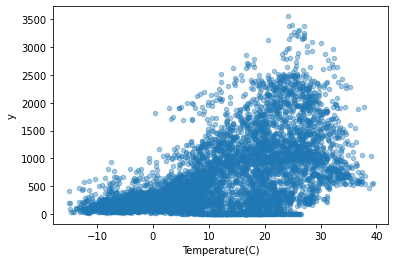

In [16]:
df.plot(kind="scatter", x="Temperature(C)", y="y",
             alpha=0.4)
plt.show()

In [17]:
# df_num = df_new.drop(['Seasons', 'Holiday', 'Functioning Day','ID','Date' ], axis=1)
# df_cat = df_new[['Seasons', 'Holiday', 'Functioning Day']]

----------------

In [18]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res) 

df = encode_and_bind(df, 'Seasons')
df = encode_and_bind(df, 'Holiday')
df = encode_and_bind(df, 'Functioning Day')


In [19]:
df

,ID,Date,y,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),...,Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,...,No Holiday,Yes,0,0,0,1,0,1,0,1
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,...,No Holiday,Yes,0,0,0,1,0,1,0,1
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,...,No Holiday,Yes,0,0,0,1,0,1,0,1
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,...,No Holiday,Yes,0,0,0,1,0,1,0,1
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,...,No Holiday,Yes,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,20/11/2018,1317,19,8.7,34,2.2,1857,-6.3,0.0,...,No Holiday,Yes,1,0,0,0,0,1,0,1
5756,5756,20/11/2018,1078,20,8.5,32,2.6,1789,-7.2,0.0,...,No Holiday,Yes,1,0,0,0,0,1,0,1
5757,5757,20/11/2018,1020,21,8.8,37,3.8,1750,-5.1,0.0,...,No Holiday,Yes,1,0,0,0,0,1,0,1
5758,5758,20/11/2018,922,22,8.9,40,3.4,1810,-3.9,0.0,...,No Holiday,Yes,1,0,0,0,0,1,0,1


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# def preprocess(df):
#     df['Date'] = pd.to_datetime(df.Date)
#     df['year']= df['Date'].apply(lambda x:x.year)
#     df['month']= df['Date'].apply(lambda x:x.month)
#     df['Week Days'] = df['Date'].apply(lambda x:x.dayofweek)
#     df.drop("Date",inplace=True,axis=1)
        
#     # standrization
#     min_max_scaler = preprocessing.StandardScaler()
#     x_scaled = min_max_scaler.fit_transform(df)
#     df = pd.DataFrame(x_scaled, columns=df.columns)
    
#     return df

In [22]:
#df.drop("ID",axis=1,inplace=True)
df['Holiday'].replace({"Holiday": 0, "No Holiday": 1}, inplace=True)
df['Functioning Day'].replace({"Yes": 0, "No": 1}, inplace=True)
df['Seasons'].replace({"Autumn": 1, "Spring": 2, "Summer": 3, "Winter": 4}, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df['year']= df['Date'].apply(lambda x:x.year)
df['month']= df['Date'].apply(lambda x:x.month)
df['Week Days'] = df['Date'].apply(lambda x:x.dayofweek)
df.drop("Date",inplace=True,axis=1)

# # Normalization
# min_max_scaler2 = preprocessing.StandardScaler()
# x_scaled = min_max_scaler2.fit_transform(df.drop('y',axis=1))
# df2 = pd.DataFrame(x_scaled, columns=df.drop('y',axis=1).columns)
# x_scaled.shape

In [23]:
min_max_scaler3 = preprocessing.StandardScaler()
x_scaled = min_max_scaler3.fit_transform(df['y'].to_numpy().reshape(-1, 1))
x_scaled

array([[-0.68603316],
       [-0.76234659],
       [-0.80966093],
       ...,
       [ 0.4830887 ],
       [ 0.33351436],
       [-0.49677583]])

In [24]:
df_new2 = df.copy()

In [25]:
df_new2['y'] = x_scaled

----------------

In [26]:
df_new2

,ID,y,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),...,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,year,month,Week Days
0,0,-0.686033,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,0,1,0,1,0,1,2017,1,3
1,1,-0.762347,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,0,1,0,1,0,1,2017,1,3
2,2,-0.809661,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,0,1,0,1,0,1,2017,1,3
3,3,-0.910395,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,0,1,0,1,0,1,2017,1,3
4,4,-0.954656,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,0,1,0,1,0,1,2017,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,0.936391,19,8.7,34,2.2,1857,-6.3,0.0,0.0,...,0,0,0,0,1,0,1,2018,11,1
5756,5756,0.571612,20,8.5,32,2.6,1789,-7.2,0.0,0.0,...,0,0,0,0,1,0,1,2018,11,1
5757,5757,0.483089,21,8.8,37,3.8,1750,-5.1,0.0,0.0,...,0,0,0,0,1,0,1,2018,11,1
5758,5758,0.333514,22,8.9,40,3.4,1810,-3.9,0.0,0.0,...,0,0,0,0,1,0,1,2018,11,1


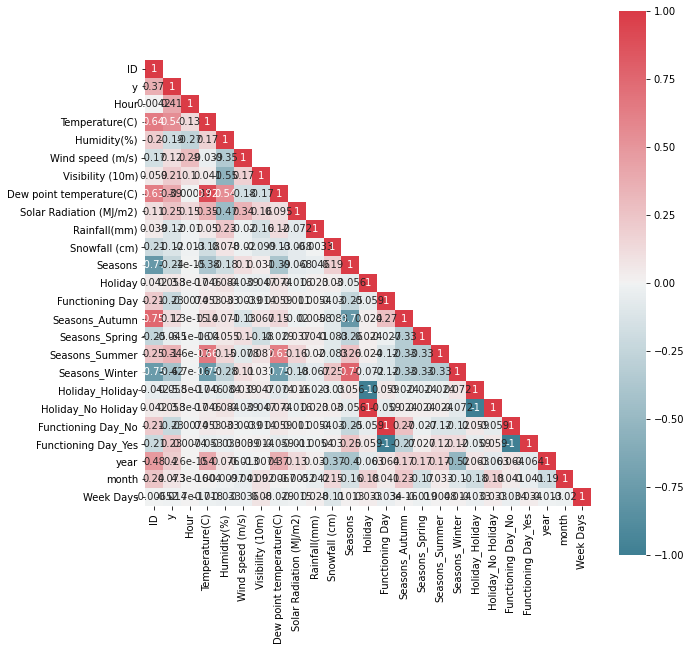

In [27]:
corr = df_new2.corr()
corr_mask = np.ones_like(corr)
corr_mask[np.tril_indices_from(corr_mask)] = False

plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=corr_mask, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True)
plt.show()

In [28]:
corr_matrix = df_new2.drop('ID',axis=1).corr()
corr_matrix["y"].sort_values(ascending=False)[1:]

Temperature(C)              0.544281
Hour                        0.407180
Dew point temperature(C)    0.392454
Seasons_Summer              0.336811
Solar Radiation (MJ/m2)     0.250601
Functioning Day_Yes         0.227269
Visibility (10m)            0.214777
year                        0.201837
Seasons_Autumn              0.123375
Wind speed (m/s)            0.116380
month                       0.073498
Holiday_No Holiday          0.058329
Holiday                     0.058329
Week Days                  -0.013907
Seasons_Spring             -0.044513
Holiday_Holiday            -0.058329
Rainfall(mm)               -0.117711
Snowfall (cm)              -0.120836
Humidity(%)                -0.191603
Functioning Day_No         -0.227269
Functioning Day            -0.227269
Seasons                    -0.239315
Seasons_Winter             -0.415673
Name: y, dtype: float64

## No outliers!!!!!

As expected ther is a rise in the demand for bikes early from 8:9 am and from 5:7 pm and as this hypothesis is true we can divide bike demand into 3 main categories:

- High : 7-9 and 17-19 hours

- Average : 10-16 hours

- Low : 0-6 and 20-24 hours Here we have analyzed the distribution of total bike demand.

As expected on average there is a high demand during non holidays, but let's check if also the hours during which there is a high demand in Holidays is different.

As we can see that we can divide the amount of rain into 3 categories:

- No rain
- Slightly raining (from >0 to 4)
- Heavily raining (>4)

As we can see that we can divide the amount of snow into 3 categories:

- No rain
- Slightly snowing (from >0 to 1.6)
- Heavily snowing (>1.6)

And we can combine these conditions together we can combine the weather conditions to create a newly categorical feature describing the weather during each day.

In [29]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5760 non-null   int64  
 1   y                         5760 non-null   float64
 2   Hour                      5760 non-null   int64  
 3   Temperature(C)            5760 non-null   float64
 4   Humidity(%)               5760 non-null   int64  
 5   Wind speed (m/s)          5760 non-null   float64
 6   Visibility (10m)          5760 non-null   int64  
 7   Dew point temperature(C)  5760 non-null   float64
 8   Solar Radiation (MJ/m2)   5760 non-null   float64
 9   Rainfall(mm)              5760 non-null   float64
 10  Snowfall (cm)             5760 non-null   float64
 11  Seasons                   5760 non-null   int64  
 12  Holiday                   5760 non-null   int64  
 13  Functioning Day           5760 non-null   int64  
 14  Seasons_

In [30]:
# for index, row in df.iterrows():
#     if 0 < row['Rainfall(mm)'] < 4:
#         if 0 < row['Snowfall (cm)'] < 1.6:
#             df.loc[index, 'compined_weather'] = 2 # rain and snowfall
#         if row['Snowfall (cm)'] > 1.6:
#             df.loc[index, 'compined_weather'] = 3 # rain and havily snowfall
#         else:
#             df.loc[index, 'compined_weather'] = 1 #rain only
            
#     if row['Rainfall(mm)'] > 4:
#         if 0 < row['Snowfall (cm)'] < 1.6:
#             df.loc[index, 'compined_weather'] = 2 # rain and snowfall
#         else:
#             df.loc[index, 'compined_weather'] = 1 #rain only
    
        

In [31]:
# def preprocess(df):
#     df = df.drop(columns=['ID','y'])
#     df['Holiday'].replace({"Holiday": 0, "No Holiday": 1}, inplace=True)
#     df['Functioning Day'].replace({"Yes": 0, "No": 1}, inplace=True)
#     df['Seasons'].replace({"Autumn": 1, "Spring": 2, "Summer": 3, "Winter": 4}, inplace=True)
#     df['Date'] = pd.to_datetime(df.Date)
#     df['year']= df['Date'].apply(lambda x:x.year)
#     df['month']= df['Date'].apply(lambda x:x.month)
#     df['Week Days'] = df['Date'].apply(lambda x:x.dayofweek)
#     df.drop("Date",inplace=True,axis=1)
        
#     # Normalization
#     min_max_scaler = preprocessing.MinMaxScaler()
#     x_scaled = min_max_scaler.fit_transform(df)
#     df = pd.DataFrame(x_scaled, columns=df.columns)
    
#     return df

In [32]:
# train_df2 = preprocess(df)

In [33]:
# train_df2['ID'] = df['ID']
# train_df2['y'] = df['y']
# train_df2

Now let's check for the linear fit with the most correlated features before starting Feature engineering

In [34]:
# figure, axes = plt.subplots(nrows=2, ncols=2) 
# plt.tight_layout()
# figure.set_size_inches(7, 6)


# sns.regplot(x='Temperature(C)', y='y', data=df, ax=axes[0, 0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
# sns.regplot(x='Visibility (10m)', y='y', data=df, ax=axes[0, 1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
# sns.regplot(x='Hour', y='y', data=df, ax=axes[1, 0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
# sns.regplot(x='Humidity(%)', y='y', data=df, ax=axes[1, 1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'});

As we can see that no variable will give us a proper model with single variable linear regression so we have a lot to think about which model will be better?

Polynomial regression?(which features to put in? how to check if it is valid to assume that we can approximate the real model with a linear one?)
Kmeans?
Let's see what the data is hiding from us by creating the suggested variable above.

# Encoding

In [35]:
# cols_categ_encoding = ['Seasons', 'Holiday', 'Functioning Day']
# df_new = df.copy()
# my_encoder = LabelEncoder()

# for col in cols_categ_encoding:
#     df_new[col] = my_encoder.fit_transform(df_new[col])
    

# Data Splitting


Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio.

Note: a good way to generate reproducible results is to set the seed to the algorithms that depends on randomization. This is done with the argument random_state in the following command

In [36]:

# from sklearn.preprocessing import MinMaxScaler

# def normalize_column(df,column):
#     return MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))

# names=['Hour',
#     'Temperature(C)',
#     'Dew point temperature(C)',
#     'Solar Radiation (MJ/m2)',  #---------
#     'Rainfall(mm)',
#     'Snowfall (cm)',
#     'Seasons',
#     'Functioning Day',
    
#     'Humidity(%)',
#     'Wind speed (m/s)',
#     'Visibility (10m)',
#     'Holiday']

# for i in names:
#     df_new[i]=normalize_column(df_new,i)

In [37]:
# df_new['combined_weather']=df_new['Rainfall(mm)'].astype(float)+df_new['Snowfall (cm)'].astype(float)

In [38]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(22,11))
# plt.title('Pearson Correlation of Features', y=1.05, size=20)

# sns.heatmap(df_new.drop('ID',axis=1).corr(),linewidths=0.1,vmax=1.0,cmap=colormap, linecolor='white', annot=True)

In [39]:
# df_new.drop(['ID','Date'],axis=1).corr()['y'][1:]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

train_df, val_df = train_test_split(df_new2, test_size=0.2, random_state=0) # Try adding `stratify` here

X_train = train_df.drop(columns=['ID', 'y'])
y_train = train_df['y']

X_total = df_new2.drop(columns=['ID', 'y'])
y_total = df_new2['y']

X_val = val_df.drop(columns=['ID', 'y'])
y_val = val_df['y']

In [41]:
train_df.columns


Index(['ID', 'y', 'Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes',
       'year', 'month', 'Week Days'],
      dtype='object')

In [42]:
corr_matrix = df_new2.drop('ID', axis=1).corr()
corr_matrix["y"].sort_values(ascending=False)[1:]

Temperature(C)              0.544281
Hour                        0.407180
Dew point temperature(C)    0.392454
Seasons_Summer              0.336811
Solar Radiation (MJ/m2)     0.250601
Functioning Day_Yes         0.227269
Visibility (10m)            0.214777
year                        0.201837
Seasons_Autumn              0.123375
Wind speed (m/s)            0.116380
month                       0.073498
Holiday_No Holiday          0.058329
Holiday                     0.058329
Week Days                  -0.013907
Seasons_Spring             -0.044513
Holiday_Holiday            -0.058329
Rainfall(mm)               -0.117711
Snowfall (cm)              -0.120836
Humidity(%)                -0.191603
Functioning Day_No         -0.227269
Functioning Day            -0.227269
Seasons                    -0.239315
Seasons_Winter             -0.415673
Name: y, dtype: float64

In [43]:
features = [
    'Hour',
    'Temperature(C)',
    'Dew point temperature(C)',
   # 'Solar Radiation (MJ/m2)',  #---------
   'Rainfall(mm)',
    'Snowfall (cm)',
    'Seasons',
    'Functioning Day',
    
 #   'Humidity(%)',
#  'Wind speed (m/s)',
     'Visibility (10m)',
     'Holiday',
    'Seasons_Spring',
   # 'month',
    
    
    #'Week Days',
    
    'Seasons_Summer',
  # 'Functioning Day_Yes',
   # 'Functioning Day_No',
  #  'Seasons_Winter',
    'Holiday_Holiday',
    






]

new features 

In [44]:
# features = [
#     'Hour',
#     'Temperature(C)',
#   #  'Dew point temperature(C)',
#     'Solar Radiation (MJ/m2)',  #---------
#    # 'Rainfall(mm)',
#     #'Snowfall (cm)',
#   #  'Seasons',
#    # 'Functioning Day',
    
#  #   'Humidity(%)',
# #     'Wind speed (m/s)',
# #     'Visibility (10m)',
#  #    'Holiday',
    
    
#     #'day_of_week',
    
#    #'combined_weather',
    
#     'Seasons_Summer',
#     'Seasons_Winter',
#     'Functioning Day_Yes',
#     'Functioning Day_No',
#     'Seasons_Winter'
    






# ]

In [45]:
# This cell is used to select the numerical features only. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.
X_train = X_train[features]
X_val = X_val[features]

X_total = X_total[features]

# Model Training
Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions.

In [46]:
# for x in range(1,101):
#     # Create an instance of the classifier
#     Regressor1 = RandomForestRegressor(max_depth=17, random_state=0, n_estimators=x)

#     # Train the classifier
#     Regressor1.fit(X_train, y_train)
#     y_pred = Regressor1.predict(X_val).astype(int)


#     acc_RandomForestscore = round(Regressor1.score(X_train, y_train) * 100, 2)
#     acc_RandomForestMSLE = round((mean_squared_log_error(y_val, y_pred)), 4)
    
#     print(x)
#     print(acc_RandomForestMSLE)

In [47]:
# Create an instance of the classifier
Regressor1 = RandomForestRegressor(max_depth=20, random_state=42, n_estimators=7)

# Train the classifier
Regressor1.fit(X_train, y_train)

y_pred = Regressor1.predict(X_val).round().astype(int)


acc_RandomForestscore = round(Regressor1.score(X_train, y_train) * 100, 2)
#acc_RandomForestMSLE = round(np.sqrt(mean_squared_log_error(y_val, y_pred)), 4)

In [48]:
# Create an instance of the classifier
Regressor2 = GradientBoostingRegressor(random_state=0)

# Train the classifier
Regressor2.fit(X_train, y_train)

y_pred = Regressor2.predict(X_val).round()
y_pred[y_pred<0] = 1

acc_GradientBoostingscore = round(Regressor2.score(X_train, y_train) * 100, 2)

try:
    acc_GradientBoostingMSLE = round(np.sqrt(mean_squared_log_error(y_val, y_pred)), 4)
except:
    acc_GradientBoostingMSLE = -1000
    
y_pred

array([-0.,  1.,  1., ..., -0.,  1.,  1.])

In [49]:
# Create an instance of the classifier
Regressor3 = LinearRegression()

# Train the classifier
Regressor3.fit(X_train, y_train)

y_pred = Regressor3.predict(X_val).round()

y_pred[y_pred<0] = 1

acc_LinearRegressionscore = round(Regressor3.score(X_train, y_train) * 100, 2)

try:
    acc_LinearRegressionMSLE= round(np.sqrt(mean_squared_log_error(y_val, y_pred)), 4)
except:
    acc_LinearRegressionMSLE= -1000
    
y_pred

array([ 1.,  1.,  1., ..., -0.,  1.,  1.])

In [50]:
knn = KNeighborsRegressor(n_neighbors = 4, weights='distance',algorithm='auto', p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val).round()

acc_knnscore = round(knn.score(X_train, y_train) * 100, 2)
#acc_knnMSLE = round(np.sqrt(mean_squared_log_error(y_val, y_pred)), 4)

# machine learning
- RandomForestRegressor
- KNeighborsRegressor
- SVR
- GradientBoostingRegressor
- LinearRegression

In [51]:
# Create an instance of the classifier
Regressorfull = RandomForestRegressor(max_depth=20, random_state=42, n_estimators=7)

# Train the classifier
Regressorfull.fit(X_total, y_total)



acc_RandomForestscore = round(Regressorfull.score(X_train, y_train) * 100, 2)
acc_RandomForestscore

96.96

In [52]:
# models = pd.DataFrame({
#     'Model': ['Random Forest', 'KNeighbors', 'SVR', 
#               'Gradient Boosting', 'Linear Regression'],
#     'Score': [acc_RandomForestscore, acc_knnscore, acc_SVRscore, 
#               acc_GradientBoostingscore, acc_LinearRegressionscore],
#     'MSLE': [acc_RandomForestMSLE, acc_knnMSLE, acc_SVRMSLE, 
#               acc_GradientBoostingMSLE, acc_LinearRegressionMSLE]})
# models.sort_values(by='MSLE', ascending=True)

# Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file.

First, we'll load the data.

In [53]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

print(test_df.shape)


(3000, 14)


Note that the test set has the same features and doesn't have the `y` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

**Note** y is `Rented Bike count (Target), Count of bikes rented at each hour` .

Now we'll add `y` column to the test `DataFrame` and add the values of the predicted class to it.

**I'll select the numerical features here as I did in the training set. DO NOT forget to change this step as you change the preprocessing of the training data.**

In [54]:
test_df.rename(columns={'Temperature(�C)':'Temperature(C)','Dew point temperature(�C)':'Dew point temperature(C)'},inplace=True)

In [55]:
test_df = encode_and_bind(test_df, 'Seasons')
test_df = encode_and_bind(test_df, 'Holiday')
test_df = encode_and_bind(test_df, 'Functioning Day')

In [56]:
# cols_categ_encoding = ['Seasons', 'Holiday', 'Functioning Day']
# test_df_new = test_df.copy()
# my_encoder = LabelEncoder()

# for col in cols_categ_encoding:
#     test_df_new[col] = my_encoder.fit_transform(test_df_new[col])
    

In [57]:
# names=['Hour',
#     'Temperature(C)',
#     'Dew point temperature(C)',
#     'Solar Radiation (MJ/m2)',  #---------
#     'Rainfall(mm)',
#     'Snowfall (cm)',
#     'Seasons',
#     'Functioning Day',
    
#     'Humidity(%)',
#     'Wind speed (m/s)',
#     'Visibility (10m)',
#     'Holiday']

# for i in names:
#     test_df_new[i]=normalize_column(test_df_new,i)

In [58]:
# test_df_new['combined_weather']=test_df_new['Rainfall(mm)'].astype(float)+test_df_new['Snowfall (cm)'].astype(float)

In [59]:
# test_df_new['Date'] = pd.to_datetime(test_df_new.Date)
# test_df_new['day_of_week'] = test_df_new['Date'].dt.dayofweek

In [60]:
df = test_df.copy()
df['Holiday'].replace({"Holiday": 0, "No Holiday": 1}, inplace=True)
df['Functioning Day'].replace({"Yes": 0, "No": 1}, inplace=True)
df['Seasons'].replace({"Autumn": 1, "Spring": 2, "Summer": 3, "Winter": 4}, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df['year']= df['Date'].apply(lambda x:x.year)
df['month']= df['Date'].apply(lambda x:x.month)
df['Week Days'] = df['Date'].apply(lambda x:x.dayofweek)
df.drop("Date",inplace=True,axis=1)

# # Normalization
# min_max_scaler = preprocessing.StandardScaler()
# x_scaled = min_max_scaler.fit_transform(df)
# df = pd.DataFrame(x_scaled, columns=df.columns)
# df.head()

In [61]:
test_df_new = df.copy()

In [62]:
X_test = test_df_new.drop(columns=['ID'])

# You should update/remove the next line once you change the features used for training
X_test = X_test[features]

y_test_predicted = Regressorfull.predict(X_test)

sssss = min_max_scaler3.inverse_transform(y_test_predicted.reshape(-1, 1))

test_df_new['y'] = sssss

test_df_new.head()


,ID,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,year,month,Week Days,y
0,5760,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,...,0,1,0,1,0,1,2017,12,3,195.428571
1,5761,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,...,0,1,0,1,0,1,2017,12,3,195.428571
2,5762,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,...,0,1,0,1,0,1,2017,12,3,150.000000
3,5763,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,...,0,1,0,1,0,1,2017,12,3,86.000000
4,5764,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,...,0,1,0,1,0,1,2017,12,3,54.142857


In [63]:
test_df_new['y'] = test_df_new['y'].astype(int)
test_df_new[['ID', 'y']]

,ID,y
0,5760,195
1,5761,195
2,5762,149
3,5763,85
4,5764,54
...,...,...
2995,8755,811
2996,8756,854
2997,8757,900
2998,8758,809


Now we're ready to generate the submission file. The submission file needs the columns ID and Severity only.

In [64]:
test_df_new[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows.

Press Save Version on the upper right corner of this notebook.
Write a Version Name of your choice and choose Save & Run All (Commit) then click Save.
Wait for the saved notebook to finish running the go to the saved notebook.
Scroll down until you see the output files then select the submission.csv file and click Submit.
Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

# Conclusion
In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.

